# Trabajo Semana 1

## Parte 1. Aprendizaje no supervisado: algoritmos de clustering

### Generar datasets con make_blobs() para al menos 5 clusters. Dibujarlos y configurar make_blobs() para que los clusters tengan un cierto solapamiento.

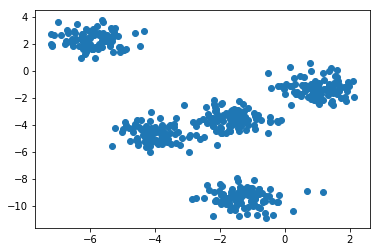

In [7]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, centers=5, cluster_std=0.6, random_state=2)

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:,0], X[:,1]);

In [8]:
from sklearn import metrics
metrics.silhouette_score(X, y, metric='euclidean')

0.71088866314809263

### Utilizar el algoritmo KMeans para crear modelos pidiendo que extraiga desde 2 hasta 10 clusters (en general, que se vaya de menos a más de los clusters realmente generados).

In [9]:
from sklearn.datasets import load_iris
dataset = load_iris()

In [10]:
from sklearn import metrics
from sklearn.cluster import KMeans

modelos=[ KMeans(n_clusters=2),
         KMeans(n_clusters=3),
         KMeans(n_clusters=4),
         KMeans(n_clusters=5),
         KMeans(n_clusters=6),
         KMeans(n_clusters=7),
         KMeans(n_clusters=8),
         KMeans(n_clusters=9),
         KMeans(n_clusters=10)]

n_cluster = 2

for nmodelo in modelos:
    nmodelo.fit(dataset.data)
    print( "Cluser {} :".format(n_cluster) ,metrics.adjusted_rand_score(dataset.target, nmodelo.labels_))
    n_cluster= n_cluster+1


Cluser 2 : 0.539921829421
Cluser 3 : 0.730238272283
Cluser 4 : 0.649817685382
Cluser 5 : 0.607896465236
Cluser 6 : 0.446168355648
Cluser 7 : 0.472428673228
Cluser 8 : 0.438902735143
Cluser 9 : 0.394666094875
Cluser 10 : 0.378943814221


Silhouette para Cluster 2: 0.680813620271


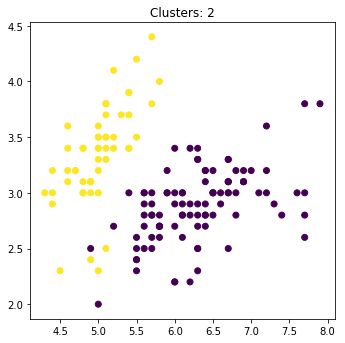

Silhouette para Cluster 3: 0.552591944521


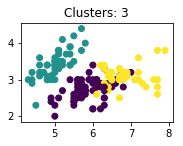

Silhouette para Cluster 4: 0.497825690075


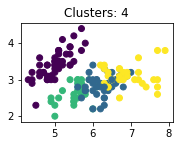

Silhouette para Cluster 5: 0.492855591798


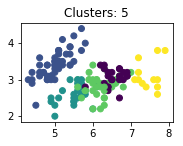

Silhouette para Cluster 6: 0.367653374944


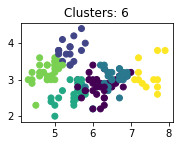

Silhouette para Cluster 7: 0.358531593371


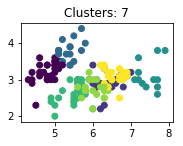

Silhouette para Cluster 8: 0.344436765732


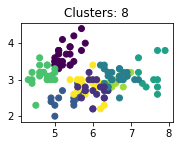

Silhouette para Cluster 9: 0.334661808597


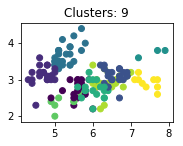

Silhouette para Cluster 10: 0.298847719292


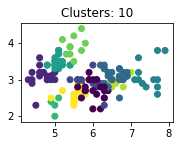

In [22]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

n_cluster = 2
sub_p = 220
for nmodelo in modelos:
    mlabels = nmodelo.labels_
    print("Silhouette para Cluster {}:".format(n_cluster), metrics.silhouette_score(dataset.data, mlabels, metric='euclidean'))    
    
    #plt.subplot(n_cluster)
    sub_p = sub_p + 1 
    plt.subplot(sub_p)
    
    nmodelo_p=nmodelo.fit_predict(dataset.data)    
    plt.scatter(dataset.data[:, 0], dataset.data[:, 1], c=nmodelo_p)
    plt.title("Clusters: {}".format(n_cluster))
    plt.show()
    n_cluster = n_cluster+1
    
    if (sub_p>223):
        sub_p = 220


### Evaluar cada uno de los modelos con el Silhoutte score y comentar los resultados, razonando si el score nos ayudaría en un problema real a seleccionar el número de clusters a obtener.

Realizado despues de cada ejercicio

## Parte 2. Aprendizaje no supervisado: reglas de asociación (20%)

### Utilizando el Notebook de ejemplo de clase, crear datos de ejemplo de transacciones en una tienda de electrónica para las tareas (2) y (3).

In [23]:

dataset =  [['Audifonos', 'Pilas'], 
            ['Afeitadora', 'USB', 'Router','Mouse'], 
            ['Laptop','USB','Antivirus','Mouse'], 
            ['Laptop','USB','Mouse'], 
            ['Mouse','Laptop','USB','Mouse'],
            ['Mouse','Audifonos','USB','Mouse'],
            ['Carcasa celular','Protector de pantalla'],
            ['Protector de pantalla','USB','Carcasa celular'],
            ['Audifonos','USB','Cargador','Mouse'],
            ['Celular','Cargador'],
            ['USB','Cargador']]

print(dataset)

[['Audifonos', 'Pilas'], ['Afeitadora', 'USB', 'Router', 'Mouse'], ['Laptop', 'USB', 'Antivirus', 'Mouse'], ['Laptop', 'USB', 'Mouse'], ['Mouse', 'Laptop', 'USB', 'Mouse'], ['Mouse', 'Audifonos', 'USB', 'Mouse'], ['Carcasa celular', 'Protector de pantalla'], ['Protector de pantalla', 'USB', 'Carcasa celular'], ['Audifonos', 'USB', 'Cargador', 'Mouse'], ['Celular', 'Cargador'], ['USB', 'Cargador']]


### Probar diferentes configuraciones de soporte y confianza para extraer reglas significativas, concretamente, alguna regla que tenga en el antecedente más de un ítem.

In [25]:
import apriori
F, soporte = apriori.apriori(dataset, min_support=0.4, verbose=True)

{USB}:  sup = 0.727
{Mouse}:  sup = 0.545
{Mouse, USB}:  sup = 0.545


In [27]:

# Generamos las reglas de asociación de la lista de itemsets frecuentes
# En este caso, se filtran las que no llegan a una confianza determinada.
H = apriori.generate_rules(F, soporte, min_confidence=0.9, verbose=True)
H2 = apriori.generate_rules(F, soporte, min_confidence=0.2, verbose=True)

{Mouse} ---> {USB}:  conf = 1.0, sup = 0.545
{USB} ---> {Mouse}:  conf = 0.75, sup = 0.545
{Mouse} ---> {USB}:  conf = 1.0, sup = 0.545


### Explicar cómo ha calculado internamente el algoritmo el soporte y la confianza para algún caso concreto de regla, numéricamente.

In [28]:
# Generación de los 1-itemsets.
C1 = apriori.create_candidates(dataset, verbose=True)

{Afeitadora, Antivirus, Audifonos, Carcasa celular, Cargador, Celular, Laptop, Mouse, Pilas, Protector de pantalla, Router, USB}


In [29]:
# La idea es eliminar de los 1-itemsets los que no lleguen al soporte establecido.
# Esto reduce las combinaciones que hay que examinar en los siguientes pasos.
# Como el soporte que pedimos es 60% vemos que se elimina "Coke" y "Eggs".
# Por ejemplo "Eggs" solo aparece en 1/5, es decir, un 20% de las transacciones.
# Este es un paso de "poda" (prune) de los candidatos.

ftemp, stemp = apriori.support_prune(dataset, C1, 0.6)
print("1-itemsets frecuentes:", ftemp)
print("-----")
print("Soporte de los 1-itemsets:", stemp)

1-itemsets frecuentes: [frozenset({'USB'})]
-----
Soporte de los 1-itemsets: {frozenset({'Audifonos'}): 0.2727272727272727, frozenset({'Pilas'}): 0.09090909090909091, frozenset({'Afeitadora'}): 0.09090909090909091, frozenset({'Mouse'}): 0.5454545454545454, frozenset({'Router'}): 0.09090909090909091, frozenset({'USB'}): 0.7272727272727273, frozenset({'Antivirus'}): 0.09090909090909091, frozenset({'Laptop'}): 0.2727272727272727, frozenset({'Carcasa celular'}): 0.18181818181818182, frozenset({'Protector de pantalla'}): 0.18181818181818182, frozenset({'Cargador'}): 0.2727272727272727, frozenset({'Celular'}): 0.09090909090909091}


## Parte 3. Utilizando otros algoritmos (20%)

Automatically created module for IPython interactive environment


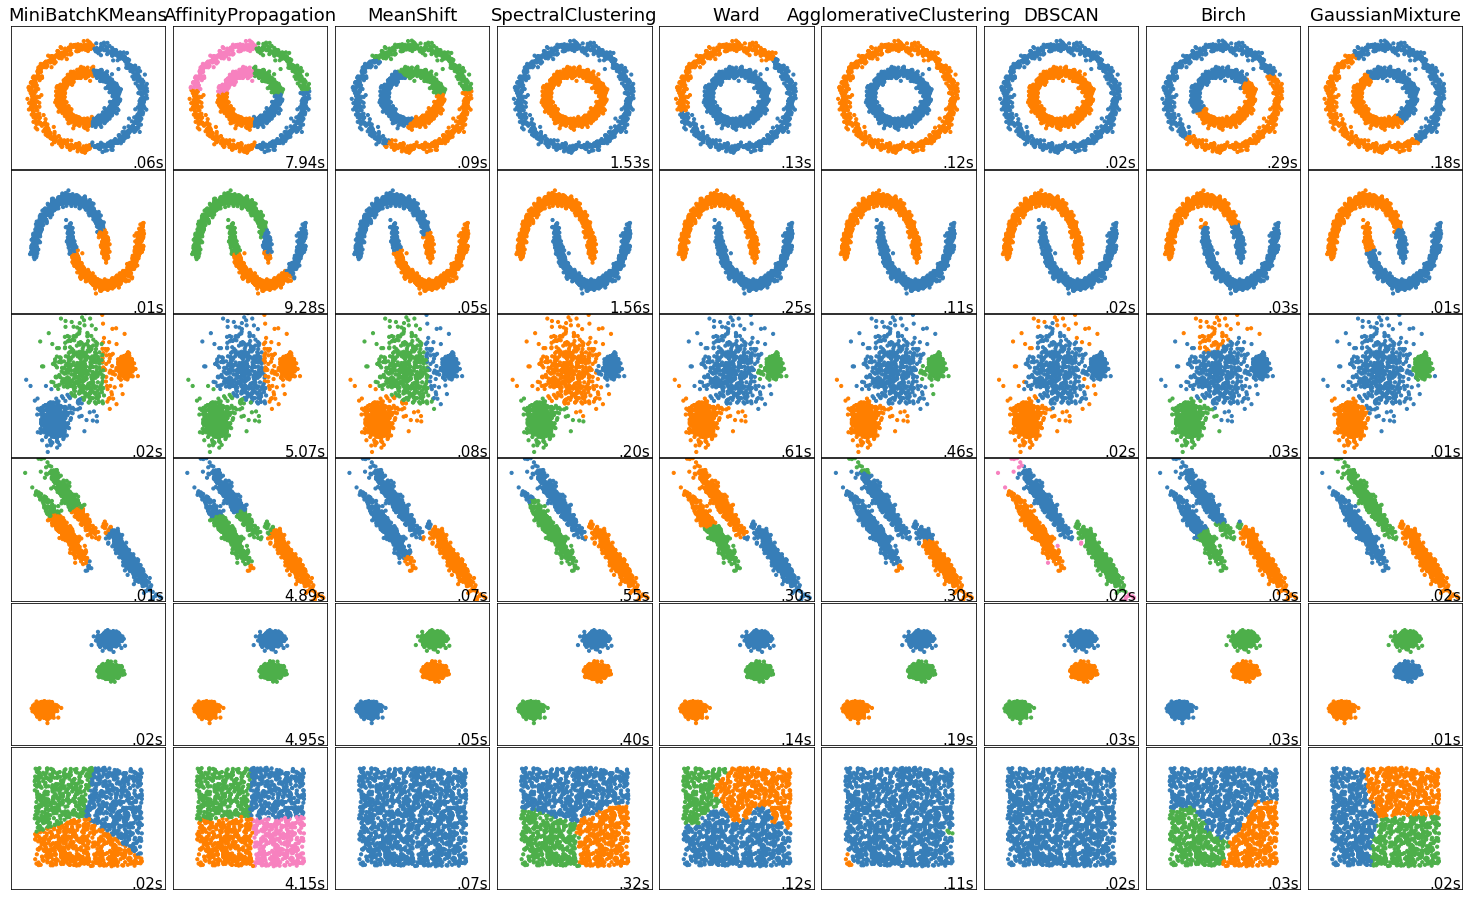

In [30]:
print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2}),
    (aniso, {'eps': .15, 'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()